In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [3]:
PATH = '../data/lda_data.csv'
TEST = 5
TOPIC = 6

In [7]:
def split_data(path, test_count):
    df = pd.read_csv(path)
    y = df.sample(n=test_count, random_state=42)
    x = df.drop(y.index)
    return x.reset_index(drop=True), y.reset_index(drop=True)

def model_set_train(data, topic_count=5):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data)
    model = LatentDirichletAllocation(n_components=TOPIC, learning_method='batch', random_state=0,
                                      max_iter=10, evaluate_every=0, n_jobs=-1)
    result = model.fit_transform(X)
    return model, result, vectorizer

def test_predict(test_data, model, vectorizer):
    Y = vectorizer.fit(test_data)
    result = model.fit(Y)
    return result

In [8]:
x, y = split_data(PATH, TEST)
y

,Article Title,Abstract,Date
0,Two-way Delayed Updates with Model Similarity ...,great achievement iot wide use edge devices br...,2023-12-01
1,Bandwidth-Aware and Overlap-Weighted Compressi...,current compression methods sparsification ave...,2024-08-01
2,Multi-Granularity Federated Learning by Graph-...,edge compute energy-limited distribute edge cl...,2025-01-01
3,Multi-provider NFV network service delegation ...,multi-provider 5g6g network service delegation...,2023-04-01
4,Asynchronous federated learning with directed ...,asynchronous afl introduce improve efficiency ...,2023-08-01


In [9]:
x, y = split_data(PATH, TEST)
model, topic, vocap = model_set_train(x['Abstract'], TOPIC)

In [11]:
def print_topic_word(lda_result, vocap, n=20):
    for idx, topic in enumerate(lda_result):
        print(f"Topic {idx} :", [vocap[i] for i in topic.argsort()[::-1][:n]])

print_topic_word(model.components_, vocap.get_feature_names_out())

Topic 0 : ['privacy', 'train', 'propose', 'security', 'share', 'accuracy', 'scheme', 'use', 'local', 'however', 'server', 'information', 'secure', 'result', 'blockchain', 'framework', 'aggregation', 'private', 'attack', 'users']
Topic 1 : ['attack', 'train', 'poison', 'malicious', 'propose', 'clients', 'participants', 'global', 'defense', 'adversarial', 'local', 'update', 'distribute', 'backdoor', 'byzantine', 'robust', 'use', 'exist', 'aggregation', 'detect']
Topic 2 : ['clients', 'train', 'local', 'propose', 'client', 'global', 'performance', 'datasets', 'non', 'method', 'privacy', 'methods', 'use', 'approach', 'different', 'heterogeneity', 'result', 'framework', 'challenge', 'image']
Topic 3 : ['network', 'use', 'privacy', 'machine', 'edge', 'challenge', 'systems', 'applications', 'iot', 'research', 'service', 'provide', 'compute', 'devices', 'security', 'distribute', 'approach', 'paper', 'system', 'present']
Topic 4 : ['network', 'propose', 'train', 'detection', 'approach', 'edge',

In [12]:
vis_data = pyLDAvis.sklearn.prepare(model, x['Abstract'], vocap)
pyLDAvis.display(vis_data)

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

Topic       0  1   2  3  4  5
Date                         
2002-02-01  0  0   0  1  0  0
2003-02-01  0  0   0  1  0  0
2005-08-01  0  0   0  1  0  0
2005-12-01  0  0   0  1  0  0
2007-03-01  1  0   0  0  0  0
...        .. ..  .. .. .. ..
2025-07-01  3  1  11  7  5  1
2025-08-01  2  0   6  4  2  0
2025-09-01  1  0   5  0  3  0
2025-10-01  5  0   5  2  1  0
2025-11-01  1  0   0  0  0  0

[138 rows x 6 columns]


<Figure size 6000x1000 with 0 Axes>

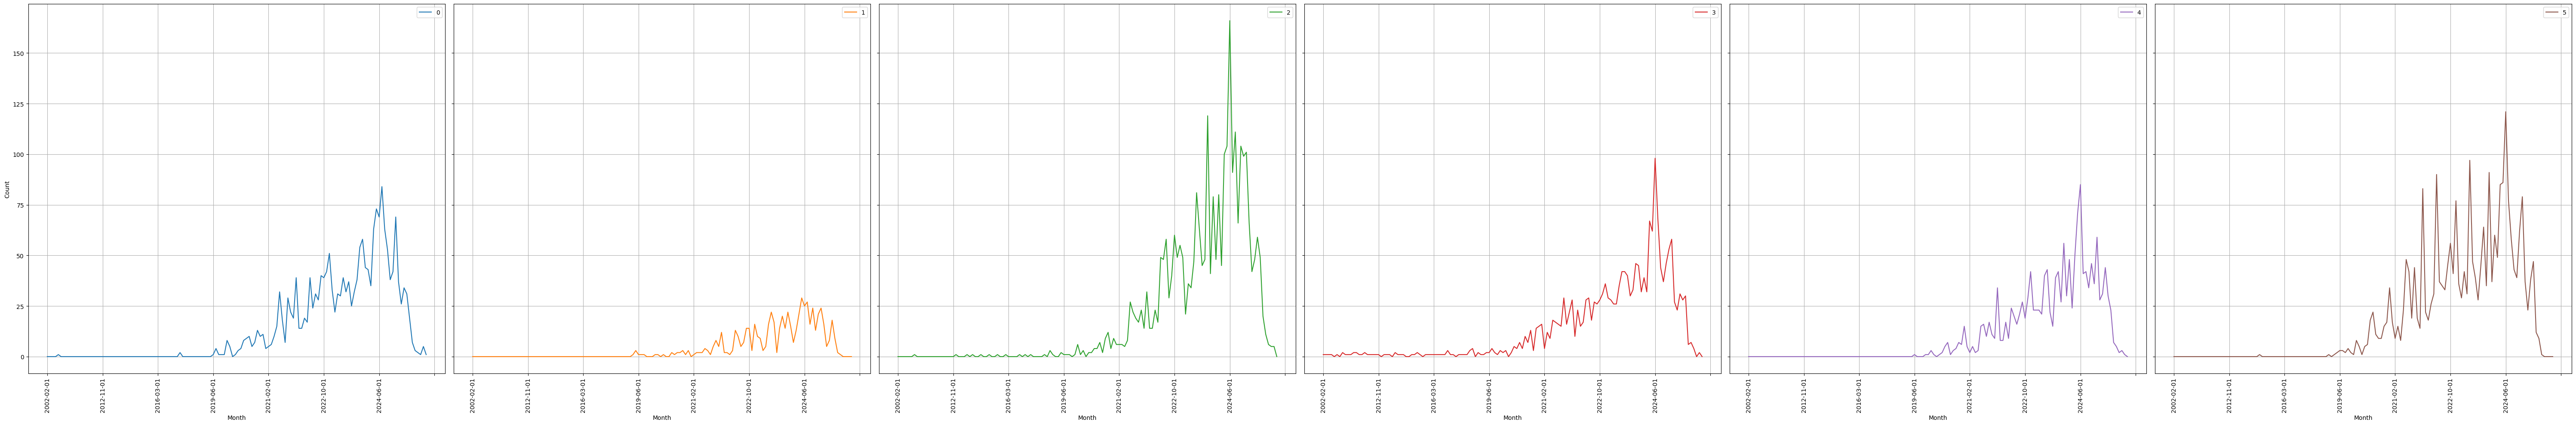

In [ ]:
def cold_hot_plot(data, topic_count, lda_result, fig_size):
    df = pd.DataFrame({'Date': data['Date'], 'Topic': lda_result.argmax(axis = 1)})
    df = df.groupby(['Date', 'Topic']).size().unstack(fill_value=0)
    plt.figure(figsize=(topic_count*fig_size[0], fig_size[1]))
    plot = df.plot(subplots=True, layout=(1, topic_count),
                   figsize=(topic_count*fig_size[0], fig_size[1]),
                   sharex=True, sharey=True, legend=True)
    
    for sub_p in plot.flatten():
        sub_p.set_xlabel('Month')
        sub_p.set_ylabel('Count')
        sub_p.grid(True)
        sub_p.tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()
    
cold_hot_plot(x, 6, topic, (10, 10))

In [29]:
topic

array([[3.20253232e-01, 1.40271320e-03, 1.47429164e-01, 1.40257140e-03,
        1.39735078e-03, 5.28114969e-01],
       [1.89446746e-01, 1.52863810e-03, 3.83134422e-01, 1.53600119e-03,
        1.53004782e-03, 4.22824145e-01],
       [1.45747159e-03, 1.44697703e-03, 9.92750523e-01, 1.44891276e-03,
        1.44503560e-03, 1.45108035e-03],
       ...,
       [5.67217780e-01, 9.54749665e-04, 1.79830007e-01, 1.47975596e-01,
        9.58178216e-04, 1.03063689e-01],
       [1.39817575e-03, 1.39791832e-03, 9.93007952e-01, 1.39708162e-03,
        1.39557118e-03, 1.40330081e-03],
       [1.68995994e-03, 2.48091602e-02, 1.67925435e-03, 9.48866223e-01,
        2.12794875e-02, 1.67591448e-03]], shape=(11359, 6))